## Usage notes
This toolkit works in the following order:

- Set up the input data
- Create model (SM, MOSM, CSM, SM-LMC, CG)
- Make an estimation of the model parameters using BNSE+SM
- Train the model parameters
- Set the prediction range
- Do a prediction

For example:
```
import mogptk

x, y = get_your_data()

data = mogptk.Data()
data.add(x, y)

mosm = mogptk.MOSM(data, Q=3)
mosm.init_params()
mosm.train()

mosm.set_prediction_range(0, 0.0, 5.0, n=200)
x_pred, mu_pred, var_pred = mosm.predict()
```

In [1]:
# import library if it is not installed
import sys
sys.path.insert(0, '../')

import mogptk
import numpy as np

%reload_ext autoreload
%autoreload 2

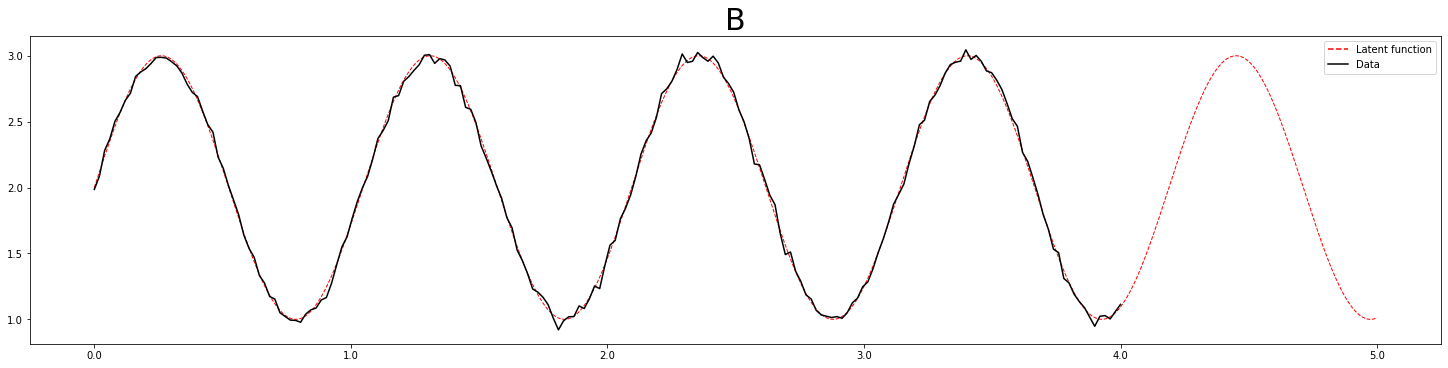

In [20]:
#data = mogptk.Data()
#data.load_csv('data/jura.csv', ['X', 'Y'], ['Cd'])#, 'Cu'])
#data.remove_range('Cd', start=2.0, end=None)
#data.remove_randomly('Cd', pct=0.90)

#data.add_function(lambda x: np.sin(6*x[:,0]) + np.cos(6*x[:,1]), n=200, start=[0.0,0.0], end=[4.0,4.0])
data = mogptk.LoadFunction(lambda x: np.sin(6*x[:,0])+2, n=200, start=0.0, end=4.0, var=0.03, name='B')
#data.add_function(lambda x: np.sin(6*x)+2 - np.sin(4*x), n=20, start=0.0, end=4.0, var=0.03, name='C')
#data.remove_range('A', start=2.0, end=None)

data.set_pred_range(0.0, 5.0, n=200)

data.plot()

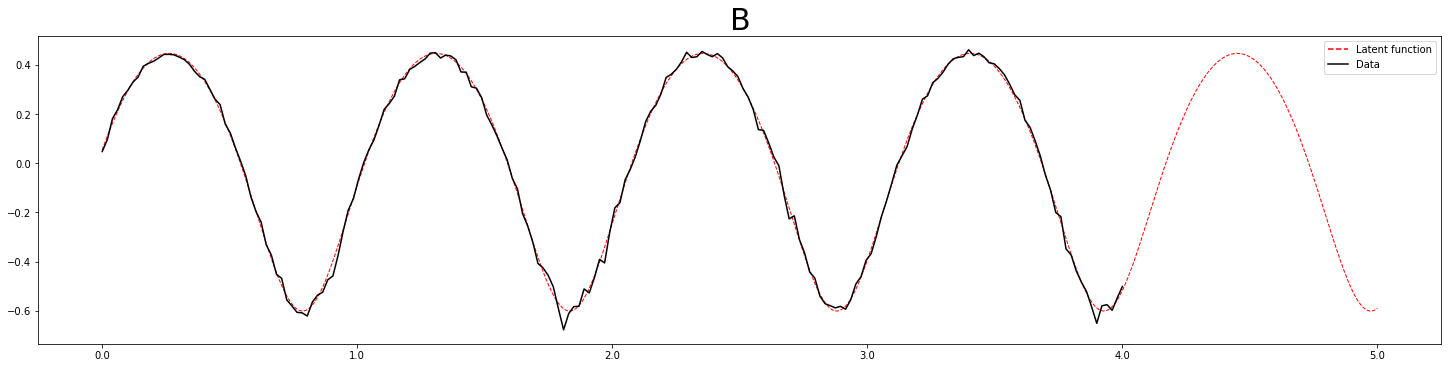

In [21]:
data.transform(mogptk.TransformLog)
data.plot()

In [27]:
sm = mogptk.SM(data, Q=3)
display(sm.get_params())

[{'num_mixtures': array(3, dtype=int32),
  'mixture_weights': array([-0.50858311, -0.61695869,  0.27514797]),
  'mixture_scales': array([[1.12836734, 0.47515849, 1.5932692 ]]),
  'mixture_means': array([[-0.25797281],
         [ 2.54056955],
         [-0.23985428]])}]

[{'num_mixtures': array(3, dtype=int32),
  'mixture_weights': array([2.63193353, 0.19073429, 0.17733218]),
  'mixture_scales': array([[0.18305107, 0.17475666, 0.22659408]]),
  'mixture_means': array([[0.95041508],
         [0.6269754 ],
         [1.27385477]])}]

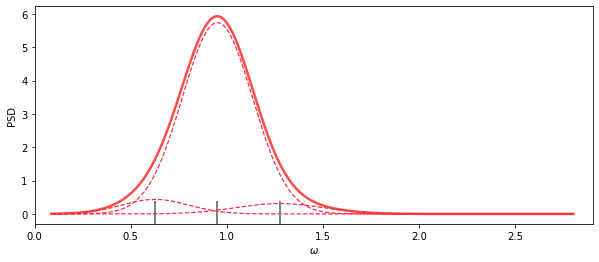

In [28]:
sm.estimate_params()
display(sm.get_params())
sm.plot_psd()

Optimization terminated successfully.
         Current function value: -463.435334
         Iterations: 95
         Function evaluations: 104
         Gradient evaluations: 104
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -463.435334
  Number of iterations: 95
  Number of functions evaluations: 104
Done in  0.023324406147003172  minutes


[{'num_mixtures': array(3, dtype=int32),
  'mixture_weights': array([1.00000000e-06, 1.41221991e-01, 2.68667210e-03]),
  'mixture_scales': array([[9.54546182e-06, 1.00000001e-06, 5.52357451e-01]]),
  'mixture_means': array([[0.95416464],
         [0.95416451],
         [1.49289513]])}]

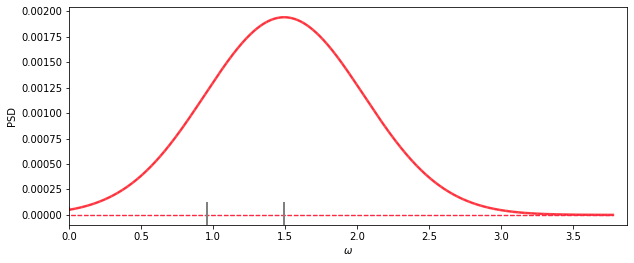

In [15]:
sm.train(method='BFGS')
display(sm.get_params())
sm.plot_psd()

1
(200, 1)
(200, 1)


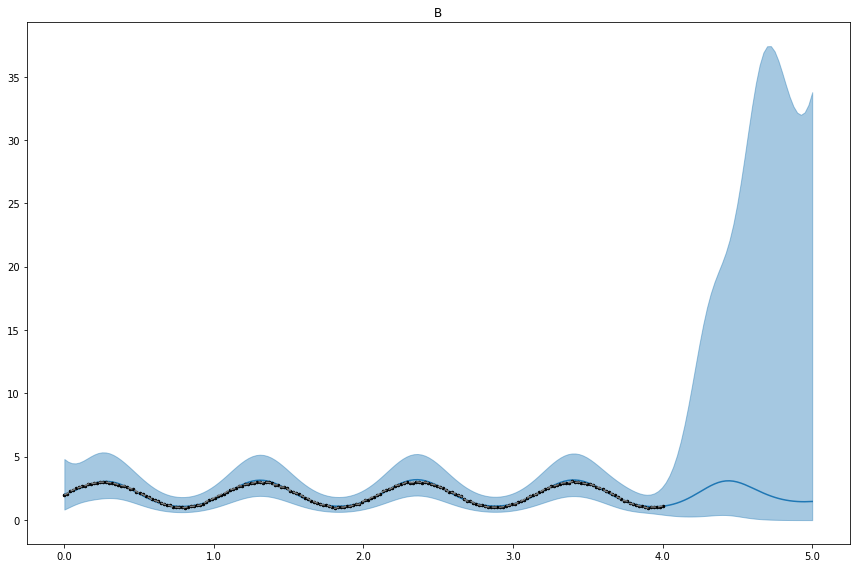

In [31]:
sm.predict(plot=True)

## MOSM

In [ ]:
mosm = mogptk.MOSM(data, Q=3)
display(mosm.get_params())

In [ ]:
mosm.estimate_params(method='SM', plot=True)
display(mosm.get_params())

In [ ]:
mosm.fix_param('variance')
mosm.train()
display(mosm.get_params())

In [ ]:
mosm.plot()

In [ ]:
data.set_pred_range(0.0, 5.0, n=200)
mosm.predict(plot=True)
#mosm.plot_prediction()

In [ ]:
mosm.save_params('mosm')
display(mosm.get_params())

In [ ]:
mosm2 = mogptk.MOSM(data, Q=3)
mosm2.load_params('mosm')
display(mosm2.get_params())

In [ ]:
mosm2.dataset.channels[0].set_pred_range(0.0, 5.0, n=200)
mosm2.predict(plot=True)

## SM-LMC

In [ ]:
smlmc = mogptk.SM_LMC(data, Q=3, Rq=1)
display(smlmc.get_params())

In [ ]:
smlmc.init_params(plot=True)
display(smlmc.get_params())

In [ ]:
smlmc.train()
display(smlmc.get_params())

In [ ]:
smlmc.build()
smlmc.set_pred_range(0, 0.0, 5.0, n=200)
smlmc.predict()
mogptk.plot_prediction(smlmc);

## CSM

In [ ]:
csm = mogptk.CSM(data, Q=3, Rq=1)
display(csm.get_params())

In [ ]:
csm.estimate_params()
display(csm.get_params())

In [ ]:
csm.train()
display(csm.get_params())

In [ ]:
#csm.set_pred_range(0.0, 5.0, n=200)
csm.predict(plot=True)

## CONV

In [ ]:
conv = mogptk.CONV(data, Q=3)
display(conv.get_params())

In [ ]:
conv.estimate_params()
display(conv.get_params())

In [ ]:
conv.train(method='Adam')
display(conv.get_params())

In [ ]:
conv.predict(plot=True)